In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
#importing the dataset and exploring it
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Exploratory Data Analysis**

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
df.shape

(25, 2)

In [ ]:
#summary
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


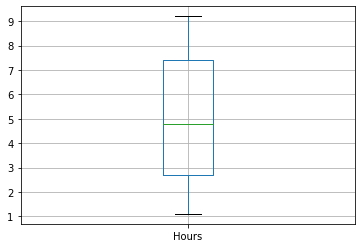

In [ ]:
#checking assumption
df.boxplot(column="Hours")

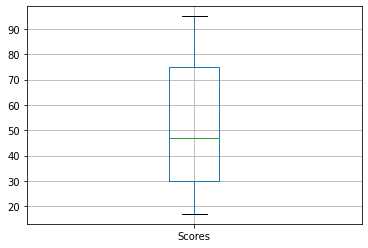

In [ ]:
df.boxplot(column="Scores")

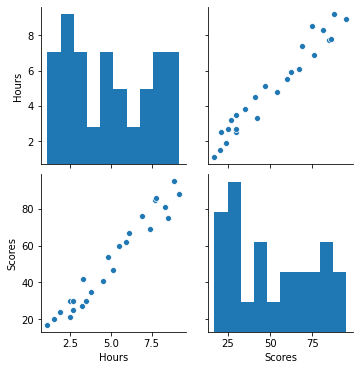

In [ ]:
#checking linearity
sns.pairplot(df)

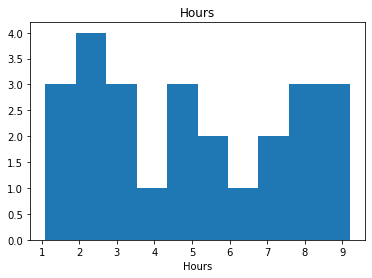

In [ ]:
#frequency distribution of "Hours"
plt.hist(df.Hours)
plt.title('Hours')
plt.xlabel('Hours')
plt.show()

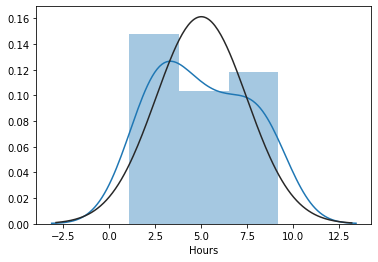

In [ ]:
#seaborn distplot for Hours, where the black line highlighting the possible normal distribution curve
sns.distplot(df["Hours"], fit=norm)

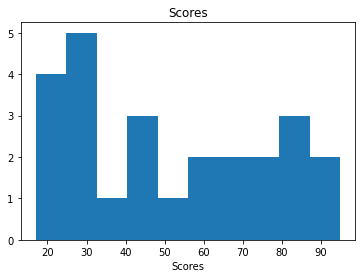

In [ ]:
#frequency distribution of "Scores"
plt.hist(df.Scores)
plt.title('Scores')
plt.xlabel('Scores')
plt.show()

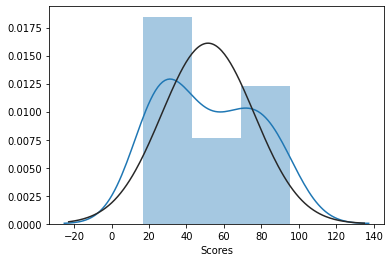

In [ ]:
#seaborn distplot for Scores, where the black line highlighting the possible normal distribution curve
sns.distplot(df["Scores"], fit=norm)

**DATA VISUALIZATION**

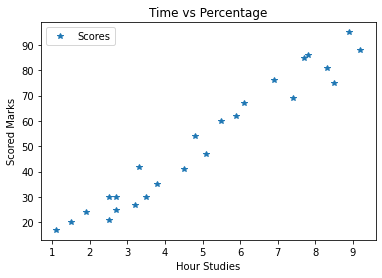

In [ ]:
#Plotting the distribution of "Scores"
df.plot(x='Hours',y='Scores',style= "*")
plt.title('Time vs Percentage')
plt.xlabel('Hour Studies')
plt.ylabel('Scored Marks')
plt.show()

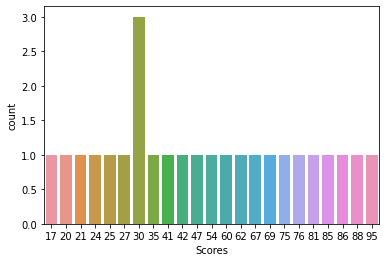

In [ ]:
#Count of Scores
sns.countplot(df['Scores'])

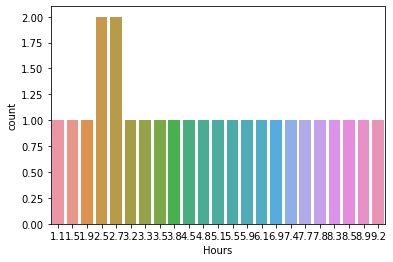

In [ ]:
#Count of Hours
sns.countplot(df['Hours'])

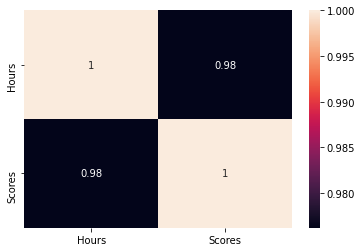

In [ ]:
#Building correlation matrix
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Preparing the data
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [ ]:
#Dividing the dataset into Training and testing
#split the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,
                                                    random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predict using the model
y_pred=lm.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
#Comparing Actual vs Predicted
df_new = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_new

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# print intercept and coefficients
print(lm.intercept_) #==> y-intercept
print(lm.coef_) #==> slope coefficients

2.018160041434662
[9.91065648]


In [ ]:
#pair the feature names with the coefficients 
print(list(zip(df, lm.coef_)))

[('Hours', 9.91065648064224)]


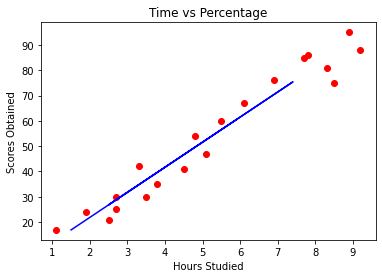

In [ ]:
#Plotting the regression line for test dataset
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.title('Time vs Percentage')
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_pred,color="blue")
plt.show()

In [ ]:
#you can also test with your own data
hours = (9.25)
pred=lm.predict([[9.25]])
print('Number of Hours = {}'.format(hours))
print('Predicted Score = {}'.format(pred))

Number of Hours = 9.25
Predicted Score = [93.69173249]


In [ ]:
#Evaluating the model
#Calculating R-square and Mean Absolute Error

r2=r2_score(y_test,y_pred)
print('R Square:',r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('The Mean Square Error is ',rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Squared is ',adjusted_r_squared)

print('The Mean Absolute Error is',metrics.mean_absolute_error(y_test,y_pred))

R Square: 0.9454906892105354
The Mean Square Error is  4.647447612100373
Adjusted R Squared is  0.9431207191762108
The Mean Absolute Error is 4.183859899002982


In [ ]:
#The accuracy of the model is 94.55%.